In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Download Apple stock 
ticker = "AAPL"
stock_data = yf.download(ticker, start="2020-01-01", end="2025-01-01")

# the 'Close' price
stock_data = stock_data[['Close']]
print(stock_data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close
Ticker           AAPL
Date                 
2020-01-02  72.716072
2020-01-03  72.009117
2020-01-06  72.582893
2020-01-07  72.241531
2020-01-08  73.403648


In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare Data
stock_data['Days'] = np.arange(len(stock_data)).reshape(-1, 1)  #  dates to numbers
X = stock_data[['Days']]
y = stock_data['Close']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict Future Stock Price
future_days = np.array([[len(stock_data) + 10]])  # Predict for 10 days ahead
predicted_price = model.predict(future_days)
print(f"Predicted Stock Price in 10 days: ${float(predicted_price[0]):.2f}")


Predicted Stock Price in 10 days: $220.01


C:\Users\Admin\AppData\Local\Temp\ipykernel_10428\1499151181.py:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Predicted Stock Price in 10 days: ${float(predicted_price[0]):.2f}")


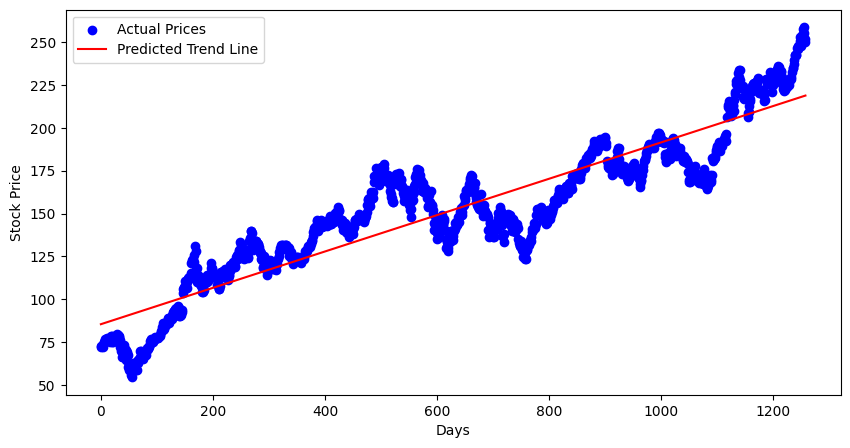

In [4]:
plt.figure(figsize=(10,5))
plt.scatter(X, y, color='blue', label='Actual Prices')
plt.plot(X, model.predict(X), color='red', label='Predicted Trend Line')
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [5]:
import pandas as pd

# Load dataset
df = pd.read_csv("AAPL.csv")

#  features
features = ["Open", "High", "Low", "Volume", "MA5", "MA20", "EMA10", "MACD", "RSI", "SnP_Close", "DJIA_Close"]
target = "Close_forcast"

# Drop missing 
df_selected = df[features + [target]].dropna()

print(df_selected.head())


   Open  High   Low     Volume    MA5    MA20     EMA10      MACD        RSI  \
0  6.66  6.69  6.50  154208600  6.470  6.4890  6.523675  0.108024  56.769238   
1  6.57  6.66  6.44  152397000  6.486  6.4830  6.499117  0.098400  52.468220   
2  6.43  6.78  6.32  252170800  6.626  6.5005  6.592744  0.116064  59.701770   
3  6.72  6.97  6.71  339440500  6.686  6.5265  6.705163  0.140547  62.495670   
4  7.02  7.03  6.83  199181500  6.726  6.5415  6.760109  0.153340  60.683333   

   SnP_Close  DJIA_Close  Close_forcast  
0    1190.10    10348.10           6.45  
1    1178.14    10285.26           6.78  
2    1195.76    10414.13           6.93  
3    1177.80    10281.10           6.87  
4    1179.59    10215.22           7.01  


In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
#  input (X) and target (y)
X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {X_train.shape}, Testing Data: {X_test.shape}")


Training Data: (2985, 11), Testing Data: (747, 11)


In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [-3.85991892e-01  5.21437436e-01  6.12747427e-01  8.04748268e-10
 -5.13612599e-01 -1.47441524e-01  9.19033761e-01 -6.47579090e-02
  3.66354385e-03  1.42760633e-03 -2.08745202e-04]
Model Intercept: 0.14534796730877986


In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Display first few predictions
predictions = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
predictions.head()


,Actual,Predicted
0,132.63,132.603781
1,104.79,106.618096
2,70.88,70.516824
3,70.43,70.224327
4,12.44,12.407157


In [10]:
# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Model Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 1.04
Mean Squared Error (MSE): 4.29
Root Mean Squared Error (RMSE): 2.07
R² Score: 0.9993


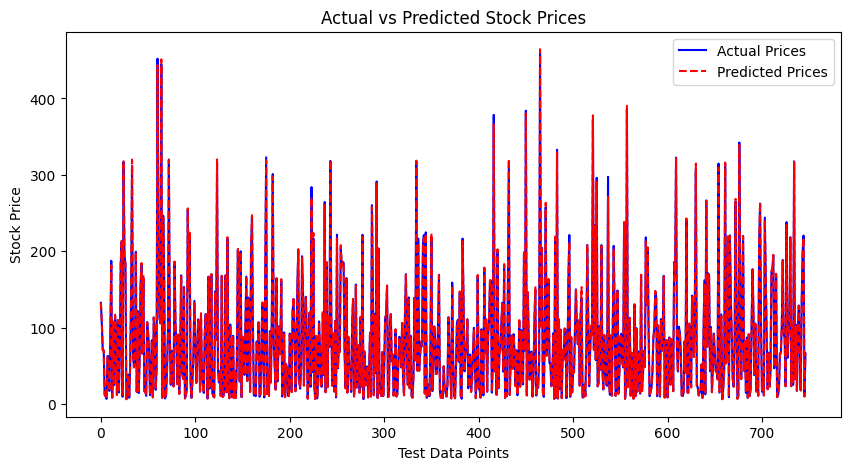

In [11]:
# Plot actual vs predicted prices
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="red", linestyle="dashed")
plt.xlabel("Test Data Points")
plt.ylabel("Stock Price")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.show()


In [12]:
latest_data = df_selected[features].iloc[-1:]

next_day_prediction = model.predict(latest_data)

print(f"📈 Predicted Stock Price for Next Day: ${next_day_prediction[0]:.2f}")


📈 Predicted Stock Price for Next Day: $464.47


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

df = pd.read_csv("UCI_Credit_Card.csv")

df.drop(['ID'], axis=1, inplace=True)

X = df.drop('default.payment.next.month', axis=1)
y = df['default.payment.next.month']

#  Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#  Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  Make Predictions
y_pred = model.predict(X_test)

#  Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8096666666666666

Confusion Matrix:
 [[4549  138]
 [1004  309]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [14]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [15]:
# 🔍 Example Customer Data (you can customize these values)
# Format: [LIMIT_BAL, SEX, EDUCATION, MARRIAGE, AGE, PAY_0, PAY_2, ..., PAY_AMT6]
example_customer = [[20000, 1, 2, 1, 24, 2, 2, -1, -1, -2, -2,
                     3913, 3102, 689, 0, 0, 0, 
                     0, 689, 0, 0, 0, 0]]

# ✅ Step 1: Scale the features just like training data
example_scaled = scaler.transform(example_customer)

# ✅ Step 2: Make prediction
prediction = model.predict(example_scaled)
probability = model.predict_proba(example_scaled)

# ✅ Step 3: Show Result
if prediction[0] == 1:
    print("🚫 The customer is likely to DEFAULT (not pay).")
else:
    print("✅ The customer is likely to PAY on time.")

print(f"🔢 Probability of Default: {probability[0][1]*100:.2f}%")


🚫 The customer is likely to DEFAULT (not pay).
🔢 Probability of Default: 53.59%


f:\1 Projects\ARs\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [16]:
# 1️⃣ Reuse the scaled features (X_scaled) and the trained model

# 2️⃣ Predict for all customers
all_preds = model.predict(X_scaled)
all_probs = model.predict_proba(X_scaled)[:, 1]  # Only take probability of class '1' (default)

# 3️⃣ Add predictions and probabilities to original DataFrame
df['Predicted_Default'] = all_preds
df['Default_Probability'] = all_probs

# 4️⃣ Show the first few predictions
print(df[['default.payment.next.month', 'Predicted_Default', 'Default_Probability']].head())


   default.payment.next.month  Predicted_Default  Default_Probability
0                           1                  1             0.507227
1                           1                  0             0.151765
2                           0                  0             0.200852
3                           0                  0             0.243083
4                           0                  0             0.141710
